In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras import initializers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_target = pd.read_csv('gender_submission.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
submission_pid = pd.DataFrame(df_test['PassengerId'])
submission_pid

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print(df_train.shape,df_test.shape)

(891, 12) (418, 11)


In [7]:
df_test = pd.concat([df_test,df_target['Survived']],axis = 1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df_test.shape

(418, 12)

In [9]:
main_df = pd.concat([df_train,df_test],axis=0)
main_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
main_df.shape

(1309, 12)

In [11]:
columns = main_df.columns

In [12]:
for fields in columns:
    print(fields,": - ",main_df[fields].isnull().sum())

PassengerId : -  0
Survived : -  0
Pclass : -  0
Name : -  0
Sex : -  0
Age : -  263
SibSp : -  0
Parch : -  0
Ticket : -  0
Fare : -  1
Cabin : -  1014
Embarked : -  2


In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [14]:
main_df.drop(['PassengerId'],axis=1,inplace=True)

In [15]:
df=pd.get_dummies(main_df.Sex)
df.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
main_df = pd.concat([main_df,df],axis=1)
main_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [17]:
main_df.drop(['Sex'],axis=1,inplace=True)
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  female    1309 non-null   uint8  
 11  male      1309 non-null   uint8  
dtypes: float64(2), int64(4), object(4), uint8(2)
memory usage: 115.0+ KB


In [19]:
columns = main_df.columns

In [20]:
for fields in columns:
    print(fields,": - ",main_df[fields].isnull().sum())

Survived : -  0
Pclass : -  0
Name : -  0
Age : -  263
SibSp : -  0
Parch : -  0
Ticket : -  0
Fare : -  1
Cabin : -  1014
Embarked : -  2
female : -  0
male : -  0


In [21]:
main_df.rename(columns = {'male': 'Sex'},inplace =True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

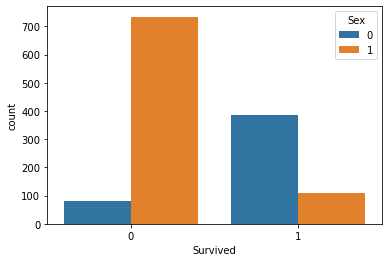

In [22]:
sns.countplot(data=main_df, x='Survived', hue='Sex')

In [23]:
main_df['Age'] = main_df['Age'].fillna(main_df['Age'].median())

In [24]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  female    1309 non-null   uint8  
 11  Sex       1309 non-null   uint8  
dtypes: float64(2), int64(4), object(4), uint8(2)
memory usage: 147.3+ KB


In [25]:
main_df['Embarked'] = main_df['Embarked'].fillna(main_df['Embarked'].mode())


In [26]:
df = pd.get_dummies(main_df.Embarked)
df.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [27]:
main_df = pd.concat([main_df,df],axis=1)
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,Sex,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [28]:
main_df.drop(['Embarked'],axis=1,inplace=True)

In [29]:
main_df.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   female    1309 non-null   uint8  
 10  Sex       1309 non-null   uint8  
 11  C         1309 non-null   uint8  
 12  Q         1309 non-null   uint8  
 13  S         1309 non-null   uint8  
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 140.9+ KB


In [30]:
main_df['Fare'] = main_df['Fare'].fillna(main_df['Fare'].median())

In [31]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Cabin     295 non-null    object 
 9   female    1309 non-null   uint8  
 10  Sex       1309 non-null   uint8  
 11  C         1309 non-null   uint8  
 12  Q         1309 non-null   uint8  
 13  S         1309 non-null   uint8  
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 140.9+ KB


In [32]:
#analysis of data and creation of new features

In [33]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292
female,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000
Sex,1309.0,0.644003,0.478997,0.00,0.0000,1.0000,1.000,1.0000
C,1309.0,0.206264,0.404777,0.00,0.0000,0.0000,0.000,1.0000
Q,1309.0,0.093965,0.291891,0.00,0.0000,0.0000,0.000,1.0000


In [34]:
main_df.loc[main_df['SibSp'] + main_df['Parch'] + 1 == 1, 'FamilySize'] = 'Single'
main_df.loc[main_df['SibSp'] + main_df['Parch'] + 1 > 1 , 'FamilySize'] = 'Small'
main_df.loc[main_df['SibSp'] + main_df['Parch'] + 1 > 4 , 'FamilySize'] = 'Big'

In [35]:
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,Sex,C,Q,S,FamilySize
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,Small
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,Single
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,Small
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,Single


In [36]:
df = pd.get_dummies(main_df.FamilySize)
df.head()

,Big,Single,Small
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [37]:
main_df = pd.concat([main_df,df],axis=1)
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,Sex,C,Q,S,FamilySize,Big,Single,Small
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,Small,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,Small,0,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,Single,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,Small,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,Single,0,1,0


In [38]:
#creating a feature from titles because certain titles might get certain preferences over regular people travelling at the time of evacuation

In [39]:
title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                }

In [40]:
title = []
for i in range(main_df.shape[0]):
    a = main_df['Name'].iloc[i].split(',')[1]
    t=a.split('.')[0]
    t.strip().lower()
    title.append(title_group[t.strip().lower()])
title

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Sir',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [41]:
len(title)

1309

In [42]:
main_df['Title'] = title
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,Sex,C,Q,S,FamilySize,Big,Single,Small,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,Small,0,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,Small,0,0,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,Single,0,1,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,Small,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,Single,0,1,0,Mr


In [43]:
main_df.Title.value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     15
Sir         11
Lady         3
Name: Title, dtype: int64

In [44]:
df = pd.get_dummies(main_df['Title'])
main_df = pd.concat([main_df,df],axis=1)
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,...,Single,Small,Title,Lady,Master,Miss,Mr,Mrs,Officer,Sir
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,1,Mr,0,0,0,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,0,1,Mrs,0,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,1,0,Miss,0,0,1,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,0,1,Mrs,0,0,0,0,1,0,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,1,0,Mr,0,0,0,1,0,0,0


In [45]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1309 non-null   int64  
 1   Pclass      1309 non-null   int64  
 2   Name        1309 non-null   object 
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Ticket      1309 non-null   object 
 7   Fare        1309 non-null   float64
 8   Cabin       295 non-null    object 
 9   female      1309 non-null   uint8  
 10  Sex         1309 non-null   uint8  
 11  C           1309 non-null   uint8  
 12  Q           1309 non-null   uint8  
 13  S           1309 non-null   uint8  
 14  FamilySize  1309 non-null   object 
 15  Big         1309 non-null   uint8  
 16  Single      1309 non-null   uint8  
 17  Small       1309 non-null   uint8  
 18  Title       1309 non-null   object 
 19  Lady        1309 non-null   

In [46]:
#creating bins for fare

In [47]:
pd.qcut(main_df['Fare'],4)

0        (-0.001, 7.896]
1      (31.275, 512.329]
2        (7.896, 14.454]
3      (31.275, 512.329]
4        (7.896, 14.454]
             ...        
413      (7.896, 14.454]
414    (31.275, 512.329]
415      (-0.001, 7.896]
416      (7.896, 14.454]
417     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [48]:
farebin=pd.qcut(main_df.Fare, 4, labels=['very_low','low','high','very_high'])
farebin

0       very_low
1      very_high
2            low
3      very_high
4            low
         ...    
413          low
414    very_high
415     very_low
416          low
417         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): ['very_low' < 'low' < 'high' < 'very_high']

In [49]:
main_df['Fare_bin'] = farebin
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,...,Small,Title,Lady,Master,Miss,Mr,Mrs,Officer,Sir,Fare_bin
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,1,Mr,0,0,0,1,0,0,0,very_low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,1,Mrs,0,0,0,0,1,0,0,very_high
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,0,Miss,0,0,1,0,0,0,0,low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,1,Mrs,0,0,0,0,1,0,0,very_high
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,Mr,0,0,0,1,0,0,0,low


In [50]:
df = pd.get_dummies(main_df.Fare_bin)
main_df = pd.concat([main_df,df],axis=1)
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,...,Miss,Mr,Mrs,Officer,Sir,Fare_bin,very_low,low,high,very_high
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,1,0,0,0,very_low,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,0,0,1,0,0,very_high,0,0,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,1,0,0,0,0,low,0,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,0,0,1,0,0,very_high,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,1,0,0,0,low,0,1,0,0


In [51]:
#creating agegroup

In [52]:
main_df['Age_group'] = np.where(main_df['Age'] >= 18, 'Adult','Child')

In [53]:
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,...,Mr,Mrs,Officer,Sir,Fare_bin,very_low,low,high,very_high,Age_group
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,1,0,0,0,very_low,1,0,0,0,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,0,1,0,0,very_high,0,0,0,1,Adult
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,0,0,0,0,low,0,1,0,0,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,0,1,0,0,very_high,0,0,0,1,Adult
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,1,0,0,0,low,0,1,0,0,Adult


In [54]:
df = pd.get_dummies(main_df.Age_group)
main_df = pd.concat([main_df,df],axis=1)
main_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,...,Officer,Sir,Fare_bin,very_low,low,high,very_high,Age_group,Adult,Child
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,0,very_low,1,0,0,0,Adult,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,0,0,very_high,0,0,0,1,Adult,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,0,0,low,0,1,0,0,Adult,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,0,0,very_high,0,0,0,1,Adult,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,0,low,0,1,0,0,Adult,1,0


In [55]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Age         1309 non-null   float64 
 4   SibSp       1309 non-null   int64   
 5   Parch       1309 non-null   int64   
 6   Ticket      1309 non-null   object  
 7   Fare        1309 non-null   float64 
 8   Cabin       295 non-null    object  
 9   female      1309 non-null   uint8   
 10  Sex         1309 non-null   uint8   
 11  C           1309 non-null   uint8   
 12  Q           1309 non-null   uint8   
 13  S           1309 non-null   uint8   
 14  FamilySize  1309 non-null   object  
 15  Big         1309 non-null   uint8   
 16  Single      1309 non-null   uint8   
 17  Small       1309 non-null   uint8   
 18  Title       1309 non-null   object  
 19  Lady   

In [56]:
#Creating new feature - Family Survival


In [57]:
f_df=pd.DataFrame()

In [58]:
f_df['Surname'] = main_df['Name'].str.extract(r'([A-Za-z]+),', expand=False)
f_df['TicketPrefix'] = main_df['Ticket'].str.extract(r'(.*\d)', expand=False)
f_df['Surname_Ticket'] = f_df['Surname'] + f_df['TicketPrefix']
f_df['IsFamily'] = f_df['Surname_Ticket'].duplicated(keep=False).astype(int)
f_df['Child'] = main_df['Age'].map(lambda x: 1 if x <=16 else 0)
FamilyWithChild = f_df[(f_df.IsFamily==1)&(f_df.Child==1)]['Surname_Ticket'].unique()
len(FamilyWithChild)

62

In [59]:
main_df['FamilyId'] = 0
for ind, identifier in enumerate(FamilyWithChild):
    main_df.loc[f_df['Surname_Ticket']==identifier, ['FamilyId']] = ind + 1
main_df['FamilySurvival'] = 1 
Survived_by_FamilyId = main_df.groupby('FamilyId').Survived.sum()
for i in range(1, len(FamilyWithChild)+1):
    if Survived_by_FamilyId[i] >= 1:
        main_df.loc[main_df.FamilyId==i, ['FamilySurvival']] = 2
    elif Survived_by_FamilyId[i] == 0:
        main_df.loc[main_df.FamilyId==i, ['FamilySurvival']] = 0

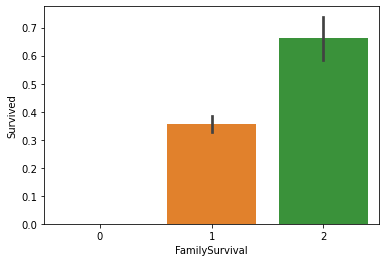

In [60]:
sns.barplot(x='FamilySurvival', y='Survived', data=main_df)
plt.show()

In [61]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        1309 non-null   int64   
 1   Pclass          1309 non-null   int64   
 2   Name            1309 non-null   object  
 3   Age             1309 non-null   float64 
 4   SibSp           1309 non-null   int64   
 5   Parch           1309 non-null   int64   
 6   Ticket          1309 non-null   object  
 7   Fare            1309 non-null   float64 
 8   Cabin           295 non-null    object  
 9   female          1309 non-null   uint8   
 10  Sex             1309 non-null   uint8   
 11  C               1309 non-null   uint8   
 12  Q               1309 non-null   uint8   
 13  S               1309 non-null   uint8   
 14  FamilySize      1309 non-null   object  
 15  Big             1309 non-null   uint8   
 16  Single          1309 non-null   uint8   
 17  Small          

In [62]:
#scaling the data

In [63]:
y = main_df['Survived']

In [64]:
y

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 1309, dtype: int64

In [65]:
main_df.drop(['Ticket','Name','Cabin','female','Survived','SibSp','Parch','FamilySize','Title','Fare_bin','Age_group'],axis=1,inplace=True)
main_df.head()

,Pclass,Age,Fare,Sex,C,Q,S,Big,Single,Small,...,Officer,Sir,very_low,low,high,very_high,Adult,Child,FamilyId,FamilySurvival
0,3,22.0,7.2500,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,3,26.0,7.9250,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1,35.0,53.1000,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
4,3,35.0,8.0500,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [66]:
scaler = MinMaxScaler()
main_df = pd.DataFrame(scaler.fit_transform(main_df), columns = main_df.columns)
main_df.head()

,Pclass,Age,Fare,Sex,C,Q,S,Big,Single,Small,...,Officer,Sir,very_low,low,high,very_high,Adult,Child,FamilyId,FamilySurvival
0,1.0,0.273456,0.014151,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5
1,0.0,0.473882,0.139136,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5
2,1.0,0.323563,0.015469,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5
3,0.0,0.436302,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5
4,1.0,0.436302,0.015713,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5


In [67]:
main_df.isnull().sum()

Pclass            0
Age               0
Fare              0
Sex               0
C                 0
Q                 0
S                 0
Big               0
Single            0
Small             0
Lady              0
Master            0
Miss              0
Mr                0
Mrs               0
Officer           0
Sir               0
very_low          0
low               0
high              0
very_high         0
Adult             0
Child             0
FamilyId          0
FamilySurvival    0
dtype: int64

In [68]:
X = main_df.copy()
X.head()

,Pclass,Age,Fare,Sex,C,Q,S,Big,Single,Small,...,Officer,Sir,very_low,low,high,very_high,Adult,Child,FamilyId,FamilySurvival
0,1.0,0.273456,0.014151,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5
1,0.0,0.473882,0.139136,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5
2,1.0,0.323563,0.015469,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5
3,0.0,0.436302,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5
4,1.0,0.436302,0.015713,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5


In [69]:
#selecting only topmost features

In [70]:
x_train,xx_test,Y_train,Y_test = train_test_split(X,y,train_size=0.8)

In [71]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(x_train, Y_train)  
print(model.feature_importances_)

[5.08199172e-02 6.86864327e-02 6.76300771e-02 6.54632550e-01
 4.47452764e-03 1.36916967e-04 2.75264002e-03 1.19420393e-02
 6.72871960e-04 8.89953929e-03 0.00000000e+00 7.10676879e-03
 3.11056359e-03 4.18742800e-03 2.78911949e-04 4.66110298e-04
 0.00000000e+00 2.54364931e-04 3.53949143e-03 2.96218577e-03
 3.10059758e-04 7.01264298e-04 5.12390456e-04 2.31214360e-02
 8.28015125e-02]


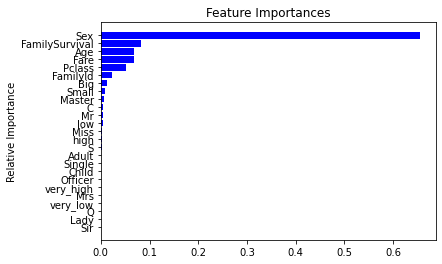

In [72]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b', align='center')
plt.yticks((range(len(indices))),[features[i] for i in indices])
plt.ylabel('Relative Importance')
plt.show()

In [73]:
x_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex', 'C', 'Q', 'S', 'Big', 'Single', 'Small',
       'Lady', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Sir', 'very_low',
       'low', 'high', 'very_high', 'Adult', 'Child', 'FamilyId',
       'FamilySurvival'],
      dtype='object')

In [74]:
selected_features = X[["Mr","FamilySurvival","Sex","Age","Fare","Pclass","FamilyId","Big","low","Small","Officer"]]
selected_features

,Mr,FamilySurvival,Sex,Age,Fare,Pclass,FamilyId,Big,low,Small,Officer
0,1.0,0.5,1.0,0.273456,0.014151,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.5,0.0,0.473882,0.139136,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.5,0.0,0.323563,0.015469,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.5,0.0,0.436302,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.5,1.0,0.436302,0.015713,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.5,1.0,0.348616,0.015713,1.0,0.0,0.0,1.0,0.0,0.0
1305,0.0,0.5,0.0,0.486409,0.212559,0.0,0.0,0.0,0.0,0.0,0.0
1306,1.0,0.5,1.0,0.480145,0.014151,1.0,0.0,0.0,0.0,0.0,0.0
1307,1.0,0.5,1.0,0.348616,0.015713,1.0,0.0,0.0,1.0,0.0,0.0


In [75]:
#modeling just on these features

In [76]:
s_df=selected_features.copy()
s_df.head()

,Mr,FamilySurvival,Sex,Age,Fare,Pclass,FamilyId,Big,low,Small,Officer
0,1.0,0.5,1.0,0.273456,0.014151,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.5,0.0,0.473882,0.139136,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.5,0.0,0.323563,0.015469,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.5,0.0,0.436302,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.5,1.0,0.436302,0.015713,1.0,0.0,0.0,1.0,0.0,0.0


In [77]:
s_df.shape

(1309, 11)

In [78]:
#using PCA

In [79]:
pca= PCA()

In [80]:
x_pca = pca.fit_transform(s_df)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.290633,-0.508970,0.498215,0.533286,-0.209611,0.163602,-0.021231,-0.061068,-0.053328,0.041046,-0.011005
1,1.145656,-0.491849,-0.009959,-0.316203,-0.156477,0.135070,-0.039653,-0.008383,-0.013832,-0.021887,-0.031706
2,0.474241,1.092628,0.192629,-0.305318,-0.137638,-0.034391,0.014918,0.013789,-0.020605,-0.008421,0.019259
3,1.144762,-0.485803,-0.005289,-0.307950,-0.155012,0.131446,-0.028153,-0.041945,-0.011046,-0.014966,-0.066563
4,-0.797590,0.522289,0.386963,-0.243736,-0.005164,0.017260,-0.040258,0.084024,-0.024250,-0.012137,0.028718


In [81]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.39774517, 0.19355426, 0.13697127, 0.12058126, 0.05407095,
       0.03544204, 0.02307812, 0.01572615, 0.01197292, 0.00610356,
       0.00475429])

In [82]:
t=s_df.columns
t

Index(['Mr', 'FamilySurvival', 'Sex', 'Age', 'Fare', 'Pclass', 'FamilyId',
       'Big', 'low', 'Small', 'Officer'],
      dtype='object')

In [83]:
n=len(explained_variance)
#print(n)
for i  in range(n):
    if(explained_variance[i]<0.01):
        print(t[i])
        s_df.drop([t[i]],axis=1,inplace=True)

Small
Officer


In [84]:
s_df.head()

,Mr,FamilySurvival,Sex,Age,Fare,Pclass,FamilyId,Big,low
0,1.0,0.5,1.0,0.273456,0.014151,1.0,0.0,0.0,0.0
1,0.0,0.5,0.0,0.473882,0.139136,0.0,0.0,0.0,0.0
2,0.0,0.5,0.0,0.323563,0.015469,1.0,0.0,0.0,1.0
3,0.0,0.5,0.0,0.436302,0.103644,0.0,0.0,0.0,0.0
4,1.0,0.5,1.0,0.436302,0.015713,1.0,0.0,0.0,1.0


In [85]:
X_train = s_df.iloc[0:891,:]
y_train = y[0:891]
X_test = s_df.iloc[891:1309,:]
y_test = y[891:1309] 

In [86]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(891, 9) (418, 9) (891,) (418,)


In [87]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [88]:
print(grid.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [89]:
print(grid.best_estimator_)

SVC(C=1000, gamma=1)


In [90]:
grid_predictions = grid.predict(X_test)

In [91]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       266
           1       0.89      0.86      0.88       152

    accuracy                           0.91       418
   macro avg       0.91      0.90      0.90       418
weighted avg       0.91      0.91      0.91       418



In [126]:
predgridcv = grid_predictions
predgridcv

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [92]:
#main  algorithm - used for kaggle

In [93]:
mod = SVC().fit(X_train,y_train)

In [94]:
accuracy_score(mod.predict(X_test),y_test)

0.9234449760765551

In [95]:
predsvm = mod.predict(X_test)
predsvm

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [96]:
print(confusion_matrix(y_test,predsvm))

[[253  13]
 [ 19 133]]


In [97]:
print(classification_report(predsvm,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       272
           1       0.88      0.91      0.89       146

    accuracy                           0.92       418
   macro avg       0.91      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



In [98]:
#First Algorithm  -  Logistic regrression

In [99]:
clf = LogisticRegression().fit(X_train,y_train)

In [100]:
p = clf.predict(X_test)
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [101]:
accuracy_score(p,y_test)

0.9617224880382775

In [102]:
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       258
           1       0.97      0.93      0.95       160

    accuracy                           0.96       418
   macro avg       0.96      0.95      0.96       418
weighted avg       0.96      0.96      0.96       418



In [103]:
#second Algorithm - random forest

In [104]:
import numpy as np
rf = RandomForestClassifier()
print(np.mean(cross_val_score(rf,X_train,y_train,cv=20,scoring='roc_auc')))

0.8879999221910987


In [105]:
mod = RandomForestClassifier().fit(X_train,y_train)

In [106]:
predict = mod.predict(X_test)
predict

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [107]:
accuracy_score(predict,y_test)

0.8349282296650717

In [108]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       259
           1       0.80      0.76      0.78       159

    accuracy                           0.83       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.83      0.83      0.83       418



In [109]:
#Third algorithm neural networks

In [110]:
in_dim = X_train.shape[1]
out_dim= 1
print(in_dim,out_dim)

9 1


In [111]:
model  = Sequential()
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = in_dim))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [112]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [113]:
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
28/28 [==============================] - 0s 628us/step - loss: 0.6918 - accuracy: 0.6162
Epoch 2/200
28/28 [==============================] - 0s 554us/step - loss: 0.6883 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 701us/step - loss: 0.6828 - accuracy: 0.6162
Epoch 4/200
28/28 [==============================] - 0s 664us/step - loss: 0.6704 - accuracy: 0.6162
Epoch 5/200
28/28 [==============================] - 0s 701us/step - loss: 0.6462 - accuracy: 0.6162
Epoch 6/200
28/28 [==============================] - 0s 701us/step - loss: 0.6037 - accuracy: 0.6162
Epoch 7/200
28/28 [==============================] - 0s 664us/step - loss: 0.5603 - accuracy: 0.6162
Epoch 8/200
28/28 [==============================] - 0s 997us/step - loss: 0.5385 - accuracy: 0.6162
Epoch 9/200
28/28 [==============================] - 0s 591us/step - loss: 0.5287 - accuracy: 0.6162
Epoch 10/200
28/28 [==============================] - 0s 664us/step - loss: 0.5228 - accura

In [114]:
pred = model.predict(X_test).round().astype(int)
pred

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [115]:
pred.size

418

In [116]:
print ('mean survival in train : {0:.3f}'.format(np.mean(pred)))
print ('mean survival in test : {0:.3f}'.format(np.mean(y_test)))

mean survival in train : 0.383
mean survival in test : 0.364


In [117]:
print(np.mean(pred)/np.mean(y_test))

1.0526315789473684


In [118]:
accuracy_score(pred,y_test)

0.9617224880382775

In [119]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       258
           1       0.97      0.93      0.95       160

    accuracy                           0.96       418
   macro avg       0.96      0.95      0.96       418
weighted avg       0.96      0.96      0.96       418



In [127]:
submission_prediction = pd.DataFrame(predgridcv)
submission_prediction

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [128]:
submission_prediction.rename(columns = {0:'Survived'},inplace = True)
submission_prediction.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [129]:
submission_df = pd.concat([submission_pid,submission_prediction],axis = 1)
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [130]:
submission_df.shape

(418, 2)

In [131]:
submission_df.to_csv('submission_csv.csv',index = False)